In [37]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg

In [38]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
from sklearn.model_selection import train_test_split

x = dataset.data[:, :]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

#### Ridge Regression:

Ist eine Erweiterung der Linearen Regression.  
Will gegen das Overfitting vorgehen.  

$SSE_{L_2} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \lambda \sum_{j=2}^p \beta_j^2$  

$\hat{\beta}^{ridge}_{\lambda} = (X^TX + \lambda I_p)^{-1}X^Ty$  

In [41]:
# RidgeRegr Class
class RidgeRegression:
    # LinRegr constructor
    def __init__(self, lamb, use_intercept=True):
        self.beta = None
        self.use_intercept = use_intercept
        self.lamb = lamb
        self.n_features = None
        
    def add_intercept(self, x):
        intercepts = np.ones(x.shape[0])
        x = np.column_stack((intercepts, x))
        return x
    
    def fit(self, x, y):
        if self.use_intercept == True:
            x = self.add_intercept(x)
        self.n_features = x.shape[1]
        # Compute the closed Form
        inner1 = np.dot(x.T, x)
        inner2 = np.dot(self.lamb, np.identity(self.n_features))
        inner = np.add(inner1, inner2)
        inv = np.linalg.inv(inner)
        self.beta = np.dot(np.dot(inv, x.T), y)
        
    def predict(self, x):
        if x.shape[1] < self.beta.shape[0] and self.use_intercept == True:
            x = self.add_intercept(x)
        predictions = np.array([np.dot(x_i, self.beta) for x_i in x])
        return predictions
    
    def compute_r2(self, y, y_mean, y_pred):
        frac1 = sum([(y[i] - y_pred[i])**2 for i in range(y.shape[0])])
        frac2 = sum([(y[i] - y_mean)**2 for i in range(y.shape[0])])
        r2 = 1 - frac1 / frac2
        return r2
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_mean = np.mean(y)
        score = self.compute_r2(y, y_mean, y_pred)
        return score

In [45]:
lambdas = [0.0, 1.0, 10, 100, 1000]

for lamb in lambdas:
    regr = RidgeRegression(lamb=lamb, use_intercept=True)
    regr.fit(x_train, y_train)

    print("Coeffs: ", regr.beta[1:])
    print("Intercept: ", regr.beta[0])
    print("R2: ", regr.score(x_test, y_test),"\n\n")

Coeffs:  [-1.32774155e-01  3.57812335e-02  4.99454423e-02  3.12127706e+00
 -1.54698463e+01  4.04872721e+00 -1.07515901e-02 -1.38699758e+00
  2.42353741e-01 -8.69095363e-03 -9.11917342e-01  1.19435253e-02
 -5.48080157e-01]
Intercept:  31.68214858214277
R2:  0.7109203586326456 


Coeffs:  [-0.12235782  0.03797231  0.02708572  2.93074238 -4.02397284  5.03717125
 -0.01622937 -1.06451699  0.16341972 -0.00760439 -0.59719469  0.01478166
 -0.51299225]
Intercept:  11.482411839842072
R2:  0.6857894628565692 


Coeffs:  [-0.12098022  0.04153068  0.02844922  2.14514204 -0.14521179  5.39288845
 -0.01211445 -0.89623526  0.13074331 -0.00685895 -0.4242982   0.01697277
 -0.50731894]
Intercept:  2.1101376981481605
R2:  0.6677988161706991 


Coeffs:  [-0.12838291  0.05850013  0.02685085  0.66258974  0.16115473  4.10527903
  0.02304492 -0.60900212  0.11129675 -0.00491704 -0.15098956  0.02154149
 -0.60920731]
Intercept:  0.4848241004039886
R2:  0.6310088677960453 


Coeffs:  [-0.13944577  0.091171   -0.017

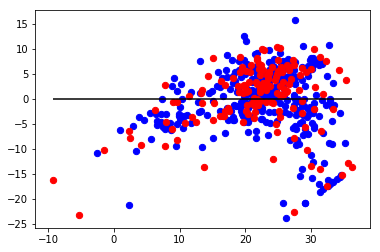

In [46]:
# Residual Plot (Restwert)

train_pred = regr.predict(x_train)
test_pred = regr.predict(x_test)

min_val = min(min(train_pred), min(test_pred))
max_val = max(max(train_pred), max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue", s=40)
plt.scatter(test_pred, test_pred - y_test, color="red", s=40)
plt.hlines(y=0, xmin=min_val, xmax=max_val)
plt.show()